In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from agglio_lib import *

In [ ]:
#-------------------------------Data Generation section---------------------------#
n = 1000
d = 50
sigma=0.5
w_radius = 10
wAst = np.random.randn(d,1)
X = getData(0, 1, n, d)/np.sqrt(d)
w0 =w_radius*np.random.randn(d,1)/np.sqrt(d)
ipAst = np.matmul(X, wAst)
# y = sigmoid(ipAst)
y = sigmoid_noisy_pre(ipAst,sigma_noise=sigma)

In [ ]:
#-----------AGGLIO-GD-------------#
params={}
params['algo']='AG_GD'
params['w0']=w0
params['wAst']=wAst
objVals_agd,distVals_agd,time_agd = cross_validate(X,y,params,cross_validation=True)

The best parameters are {'B_init': 0.1, 'B_step': 1.5, 'alpha': 50.75} with a score of -0.01


In [ ]:
#-----------AGGLIO-SGD-------------#
params={}
params['algo']='AG_SGD'
params['w0']=w0
params['wAst']=wAst
objVals_agsgd,distVals_agsgd,time_agsgd = cross_validate(X,y,params,cross_validation=True)

The best parameters are {'B_init': 0.001, 'B_step': 1.2575, 'alpha': 56.44444444444444} with a score of -0.01


In [ ]:
#-----------AGGLIO-SVRG-------------#
params={}
params['algo']='AG_SVRG'
params['w0']=w0
params['wAst']=wAst
objVals_agsvrg,distVals_agsvrg,time_agsvrg = cross_validate(X,y,params,cross_validation=True)

The best parameters are {'B_init': 0.01, 'B_step': 2.0, 'alpha': 134.0, 'temp_cap': 0.7} with a score of -0.01


In [ ]:
#-----------AGGLIO-ADAM-------------#

hparams['AG_ADAM']={}
hparams['AG_ADAM']['alpha']=np.power(10.0, [0, -1, -2, -3]).tolist()
hparams['AG_ADAM']['B_init']=np.power(10.0, [0, -1, -2, -3]).tolist()
hparams['AG_ADAM']['B_step']=np.linspace(start=1.01, stop=3, num=5).tolist()
hparams['AG_ADAM']['beta_1'] = [0.3, 0.5, 0.7, 0.9]
hparams['AG_ADAM']['beta_2'] = [0.3, 0.5, 0.7, 0.9]
hparams['AG_ADAM']['epsilon'] = np.power(10.0, [-3,  -5, -8]).tolist()

hparam = hparams['AG_ADAM']


cv = ShuffleSplit( n_splits = 1, test_size = 0.3, random_state = 42 )
grid = GridSearchCV( AG_ADAM(), param_grid=hparam, refit = False, cv=cv) #, verbose=3
grid.fit( X, y.ravel(), w_init=w0.ravel(), w_star=wAst.ravel(), minibatch_size=50)
best = grid.best_params_

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'B_init': 0.001, 'B_step': 3.0, 'alpha': 0.1, 'beta_1': 0.7, 'beta_2': 0.3, 'epsilon': 0.001} with a score of -0.01


In [ ]:
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

#ag_adam = AG_ADAM(alpha= best["alpha"], B_init=best['B_init'], B_step=best['B_step'], beta_1=best['beta_1'],  beta_2=best['beta_2'] )
ag_adam = AG_ADAM(alpha= best["alpha"], B_init=best['B_init'], B_step=best['B_step'], beta_1=best['beta_1'],  beta_2=best['beta_2'], epsilon=best['epsilon'] )
ag_adam.fit( X, y.ravel(), w_init=w0.ravel(), w_star=wAst.ravel(), from google.colab import drive
drive.mount('/content/drive')
%cd /cmax_iter=600 )

distVals_ag_adam = ag_adam.distVals
time_ag_adam=ag_adam.clock

The best parameters are {'B_init': 0.001, 'B_step': 3.0, 'alpha': 0.1, 'beta_1': 0.7, 'beta_2': 0.3, 'epsilon': 0.001} with a score of -0.01


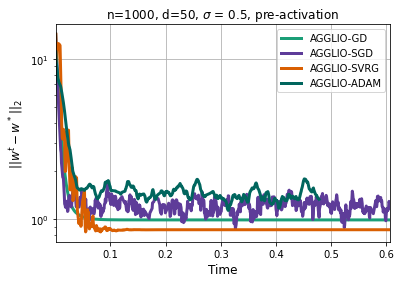

In [ ]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

fig = plt.figure()
plt.plot(time_agd, distVals_agd, label='AGGLIO-GD', color='#1b9e77', linewidth=3)
plt.plot(time_agsgd, distVals_agsgd, label='AGGLIO-SGD', color='#5e3c99', linewidth=3)
plt.plot(time_agsvrg, distVals_agsvrg, label='AGGLIO-SVRG', color='#d95f02', linewidth=3)
plt.plot(time_ag_adam, distVals_ag_adam, label='AGGLIO-ADAM', color='#01665e', linewidth=3)

plt.legend()
plt.ylabel("$||w^t-w^*||_2$",fontsize=12)
plt.xlabel("Time",fontsize=12)
plt.grid()
plt.yscale('log')
plt.xlim(time_agd[0], time_agd[-1])
plt.title(f'n={n}, d={d}, $\sigma$ = {sigma}, pre-activation')
plt.savefig('Agglio_pre-noise_sigmoid.pdf', dpi=300)
plt.show()